In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv('census.csv')

In [3]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
data.shape

(32560, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

## No missing value in Dataset

In [7]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

## Categorical columns
- Workclass         
- Education            
- Marital_status    
- Occupation        
- Relationship      
- Race              
- Sex               
- Native_country    
- Income            

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

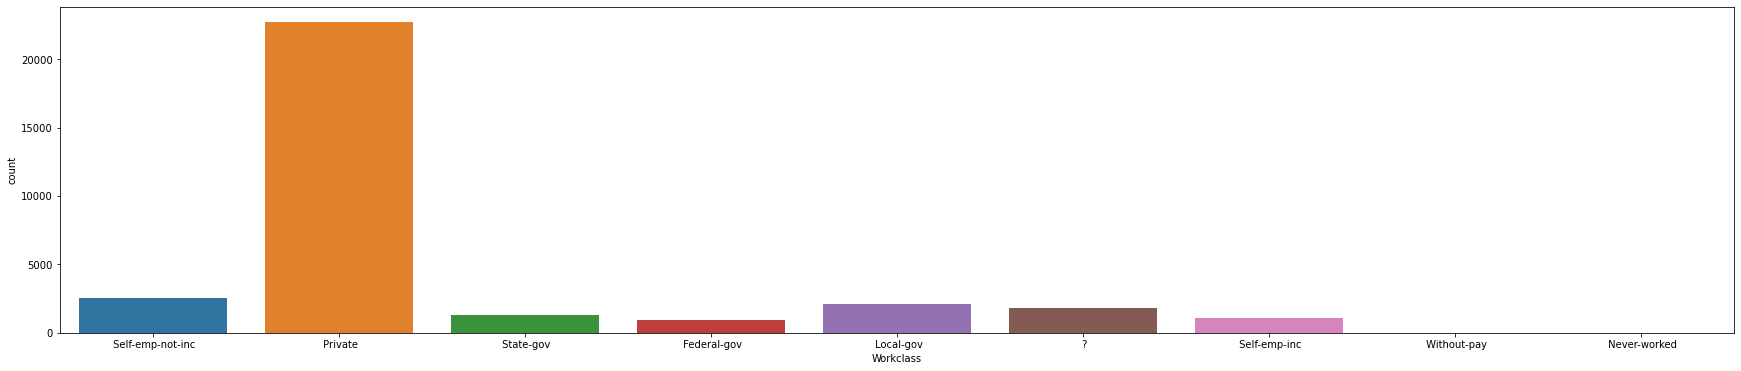

In [8]:
plt.figure(figsize=(30,6))
sns.countplot(x='Workclass',data=data,)
data['Workclass'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

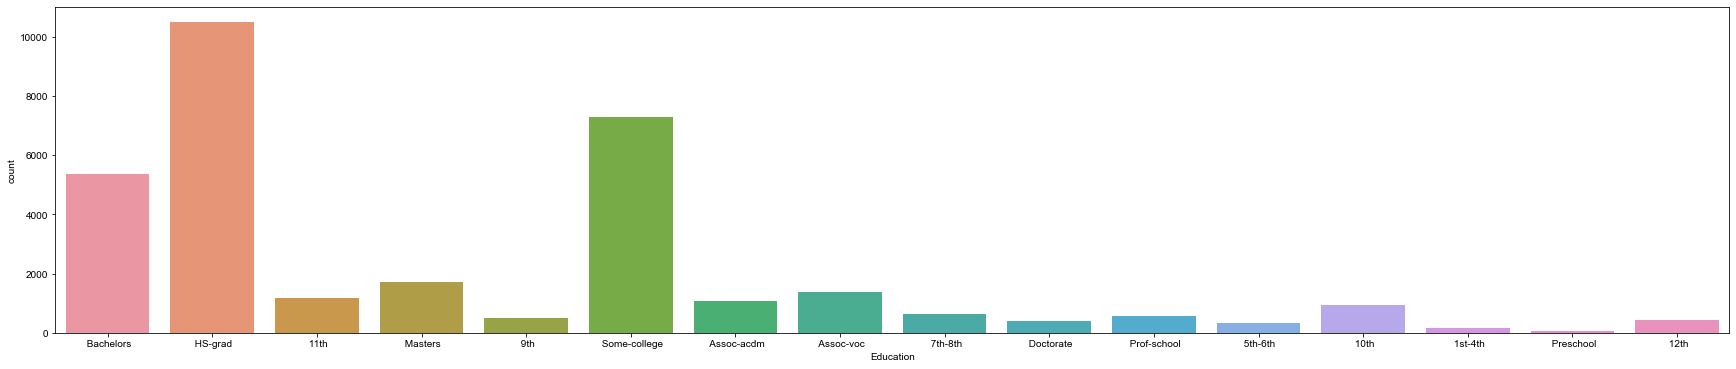

In [9]:
plt.figure(figsize=(30,6))
sns.countplot(data['Education'])
sns.set_theme(font_scale=1.5)
data['Education'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

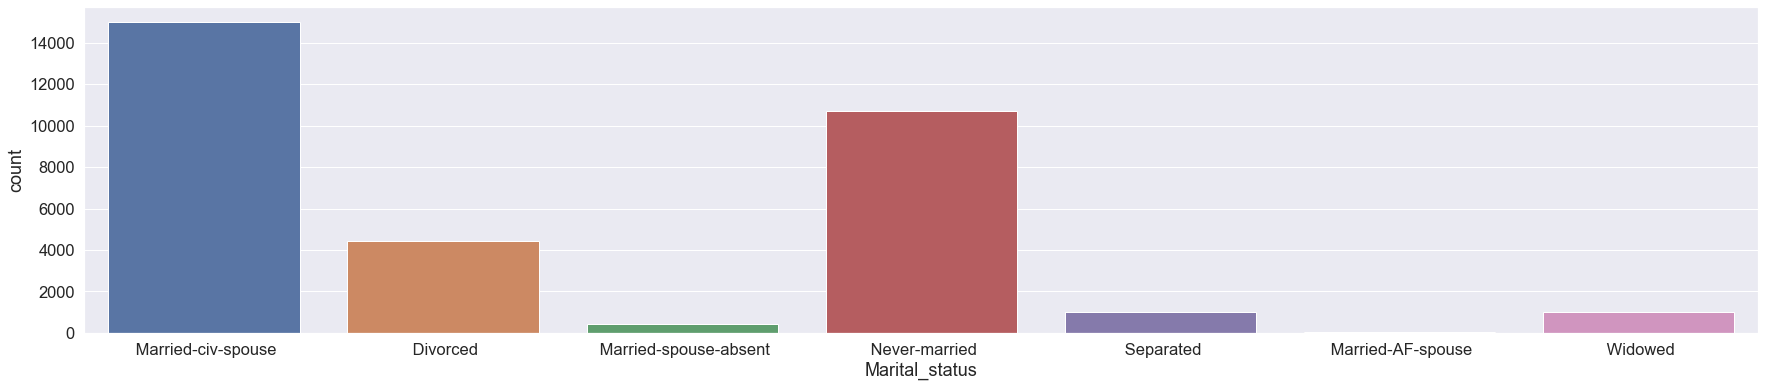

In [10]:
plt.figure(figsize=(30,6))
sns.countplot(data['Marital_status'])
sns.set_theme(font_scale=1.8)
data['Marital_status'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

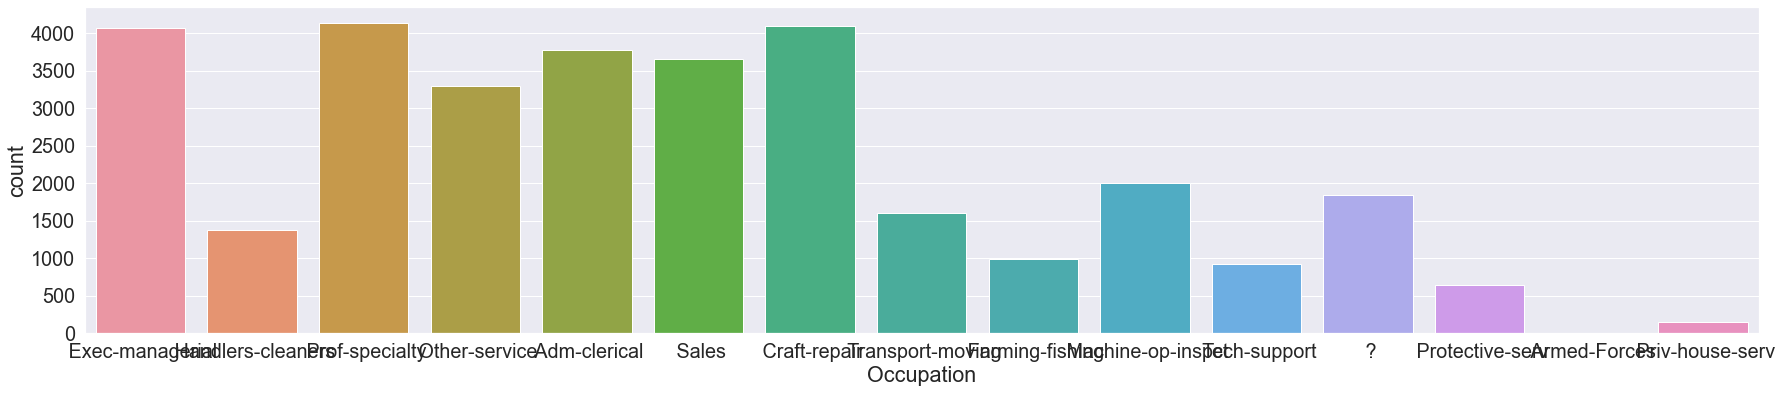

In [11]:
plt.figure(figsize=(30,6))
sns.countplot(data['Occupation'])
sns.set_theme(font_scale=1)
data['Occupation'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

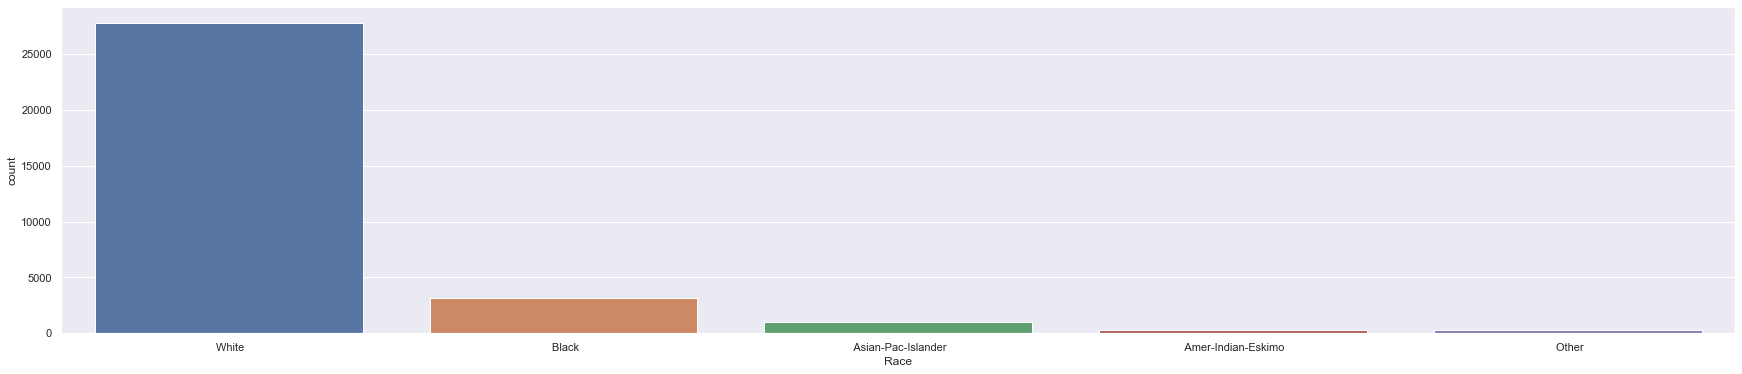

In [12]:
plt.figure(figsize=(30,6))
sns.countplot(data['Race'])
sns.set_theme(font_scale=1.8)
data['Race'].value_counts()

In [13]:
data['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [14]:
data['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [15]:
data['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [16]:
data['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [17]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72]),
 [Text(0, 0, '17'),
  Text(1, 0, '18'),
  Text(2, 0, '19'),
  Text(3, 0, '20'),
  Text(4, 0, '21'),
  Text(5, 0, '22'),
  Text(6, 0, '23'),
  Text(7, 0, '24'),
  Text(8, 0, '25'),
  Text(9, 0, '26'),
  Text(10, 0, '27'),
  Text(11, 0, '28'),
  Text(12, 0, '29'),
  Text(13, 0, '30'),
  Text(14, 0, '31'),
  Text(15, 0, '32'),
  Text(16, 0, '33'),
  Text(17, 0, '34'),
  Text(18, 0, '35'),
  Text(19, 0, '36'),
  Text(20, 0, '37'),
  Text(21, 0, '38'),
  Text(22, 0, '39'),
  Text(23, 0, '40'),
  Text(24, 0, '41'),
  Text(25, 0, '42'),
  Text(26, 0, '43'),
  Text(27, 0, '44'),
  Text(28, 0, '45'),
  Text(29, 0, '46'),
  Text(30, 0, '47'),
  Text(31, 0, '48'),
  Te

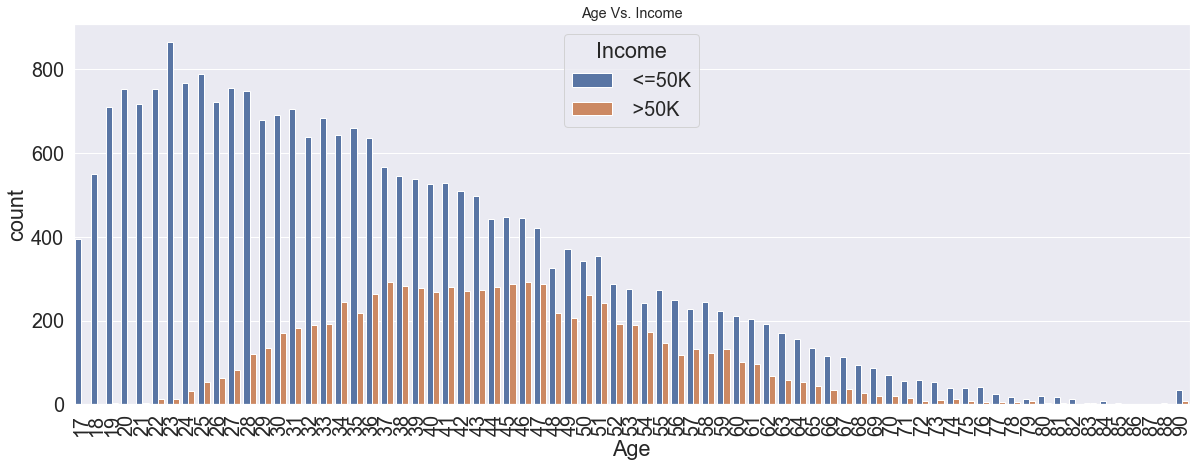

In [18]:
plt.figure(figsize=(20, 7))
sns.countplot(data['Age'],hue=data['Income'])
sns.set_theme(font_scale=1.2)
plt.title('Age Vs. Income')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Education Vs. Income')

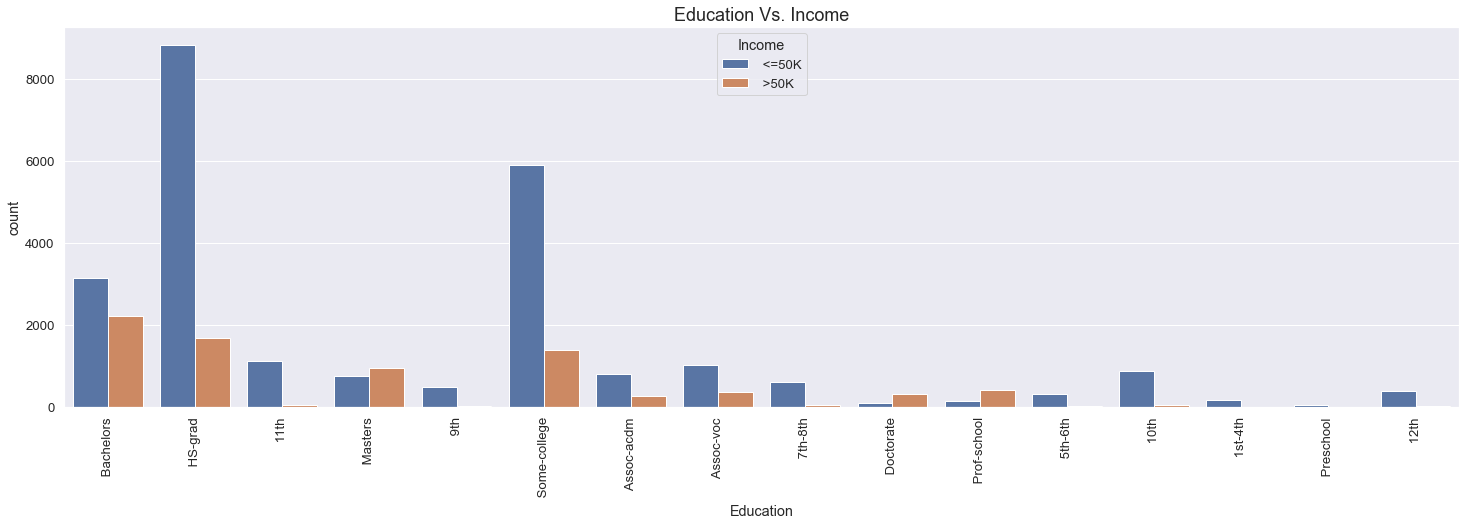

In [19]:
plt.figure(figsize=(25, 7))
sns.countplot(data['Education'],hue=data['Income'])
sns.set_theme(font_scale=1.5)
plt.xticks(rotation=90)
plt.title('Education Vs. Income')

Text(0.5, 1.0, 'Marital Status Vs. Income')

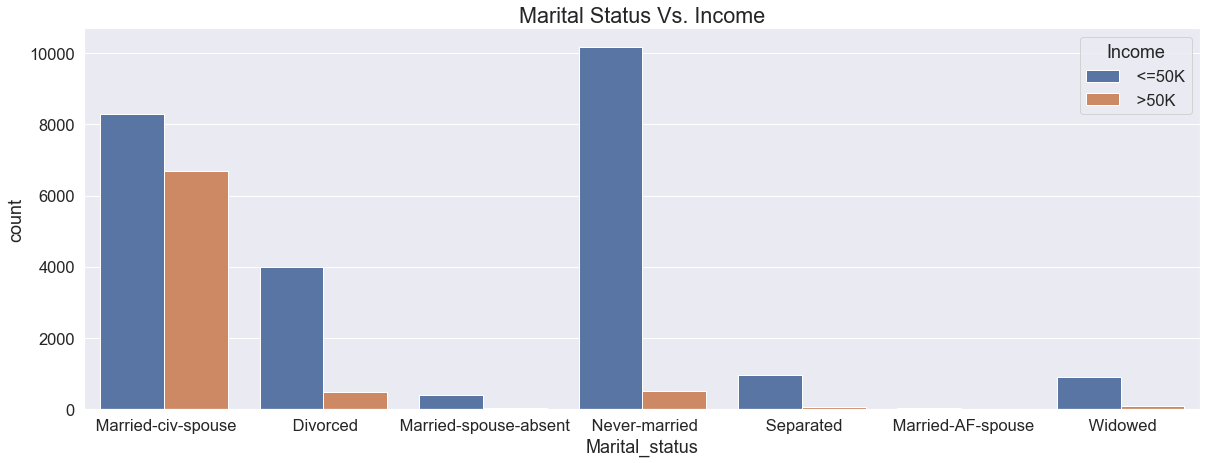

In [20]:
plt.figure(figsize=(20, 7))
sns.countplot(data['Marital_status'],hue=data['Income'])
sns.set_theme(font_scale=1.8)
plt.title('Marital Status Vs. Income')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' ?'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

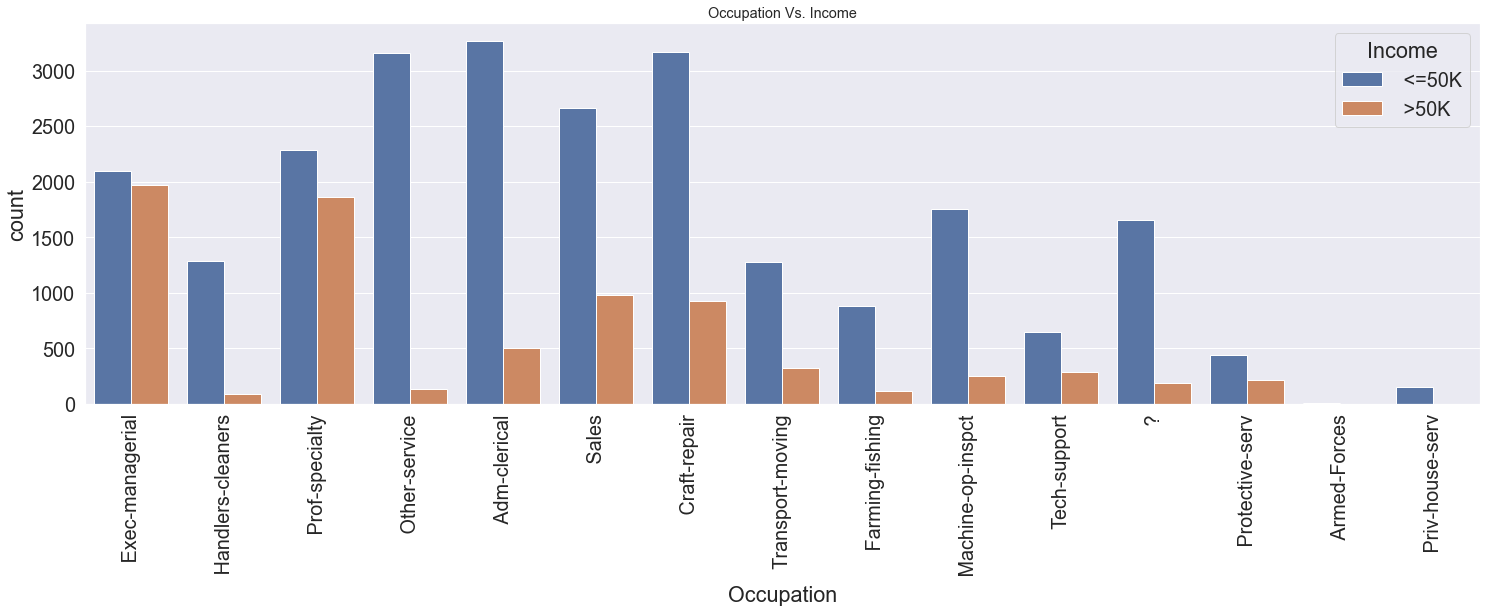

In [21]:
plt.figure(figsize=(25, 7))
sns.countplot(data['Occupation'],hue=data['Income'])
sns.set_theme(font_scale=1.2)
plt.title('Occupation Vs. Income')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Relationship Vs. Income')

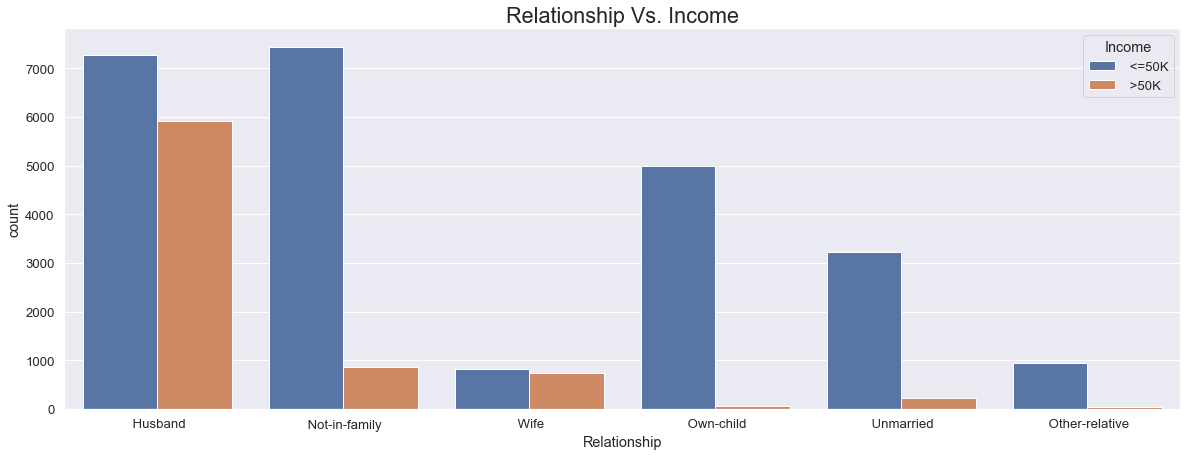

In [22]:
plt.figure(figsize=(20, 7))
sns.countplot(data['Relationship'],hue=data['Income'])
sns.set_theme(font_scale=1.8)
plt.title('Relationship Vs. Income')

Text(0.5, 1.0, 'Race Vs. Income')

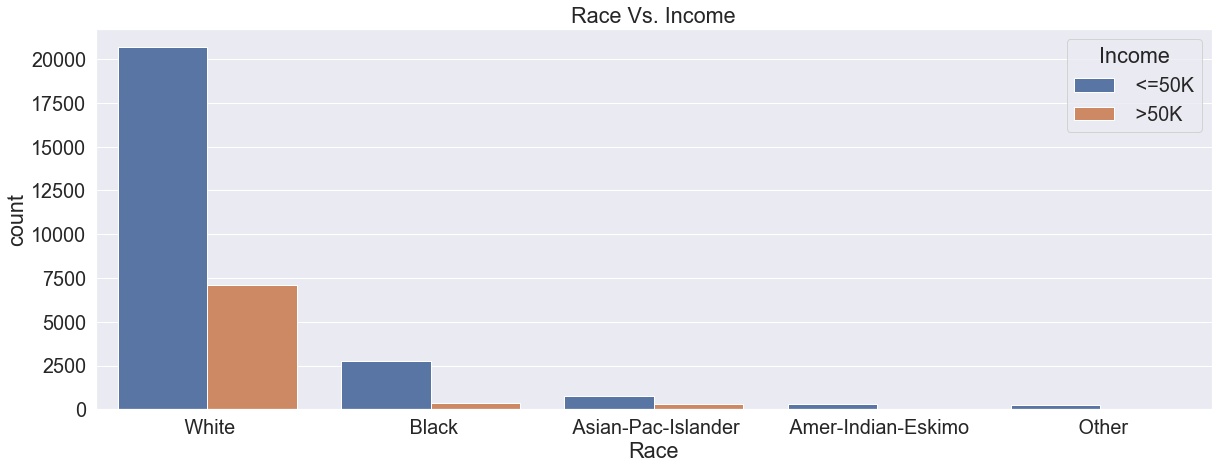

In [23]:
plt.figure(figsize=(20, 7))
sns.countplot(data['Race'],hue=data['Income'])
sns.set_theme(font_scale=1.8)
plt.title('Race Vs. Income')

Text(0.5, 1.0, 'Sex Vs. Income')

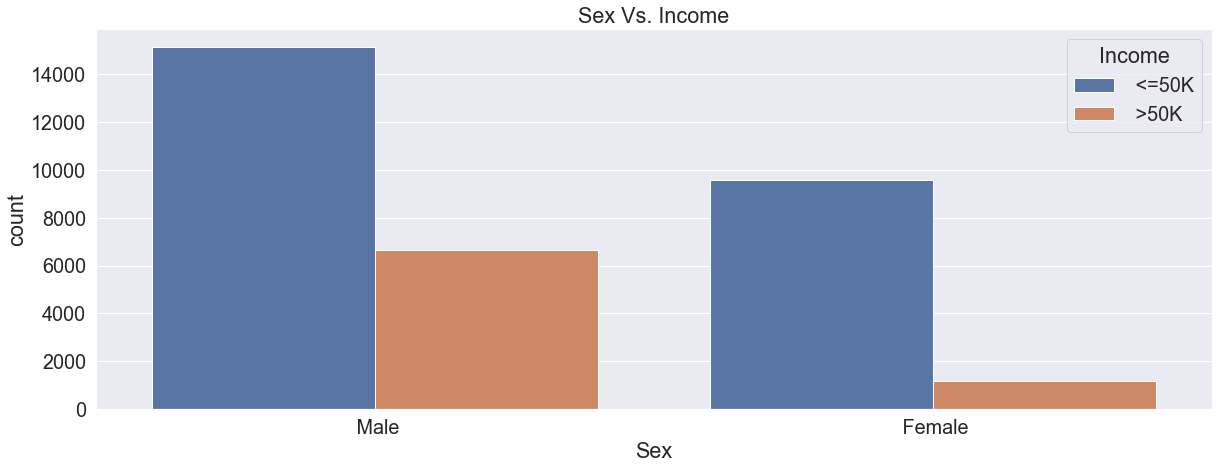

In [24]:
plt.figure(figsize=(20, 7))
sns.countplot(data['Sex'],hue=data['Income'])
sns.set_theme(font_scale=1.8)
plt.title('Sex Vs. Income')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Tex

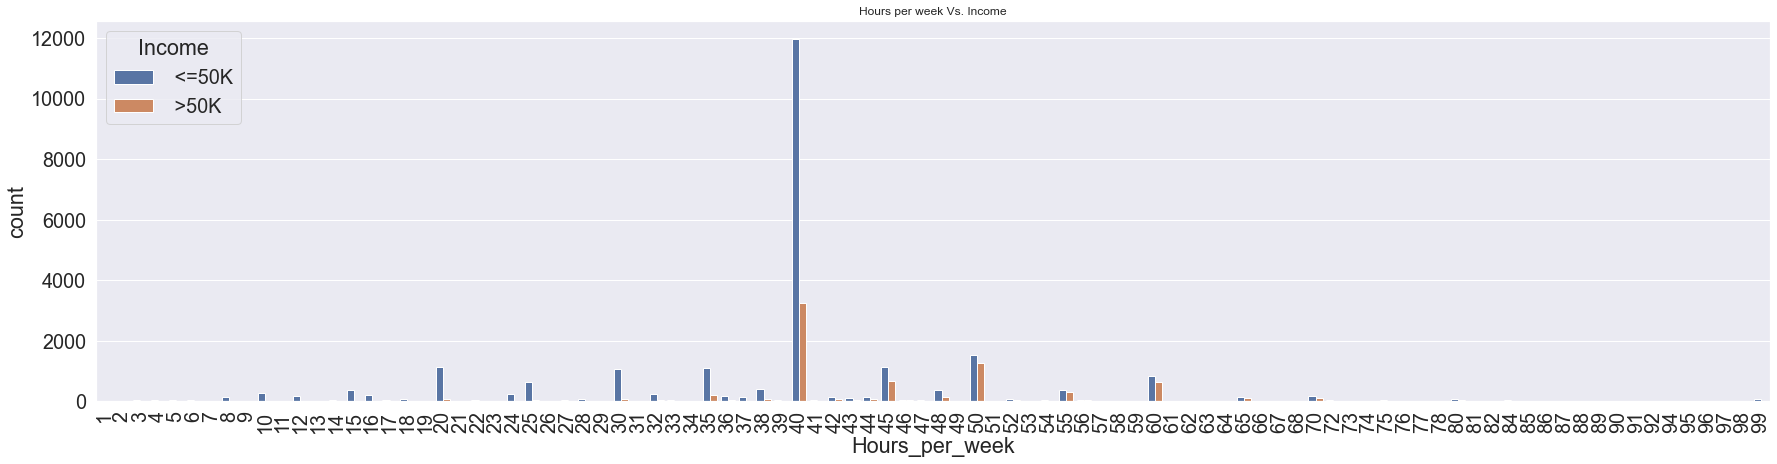

In [25]:
plt.figure(figsize=(30, 7))
sns.countplot(data['Hours_per_week'],hue=data['Income'])
sns.set_theme(font_scale=1)
plt.title('Hours per week Vs. Income')
plt.xticks(rotation=90)

## Looking at the graphs above, we make the following conclusions –
1. A person has high chance of earning >50K in case his/her race is ‘White’/’Asian-pac-islander’.
2. Males have a higher chance of earning more than 50K, than females.
3. Ratio of people earning more than 50K is higher in case Workclass is ‘Self-emp-inc’.
4. People with education level as ‘Masters/Doctorate/Prof-school’ have higher ratios of >50K earning, than <=50K. Bachelors degree also has around 10:7 ratio of <=50K : >50K.
5. If the relationship in family is either ‘Husband/Wife’, the chances of earning more than 50K is high.
6. From the scatterplot between age, hours_per_week and income, we observe that a person needs to be >30 to be earning more than 50K, else needs to work at least 60 hours_per_week to earn >50K.

In [26]:
data=data.replace('?',np.nan)

In [27]:
col=['Workclass','Occupation','Native_country']

In [28]:
for i in col:
    data[i].fillna(data[i].mode()[0],inplace=True)

In [29]:
for i in data:
    print(data[i].value_counts)

<bound method IndexOpsMixin.value_counts of 0        50
1        38
2        53
3        28
4        37
         ..
32555    27
32556    40
32557    58
32558    22
32559    52
Name: Age, Length: 32560, dtype: int64>
<bound method IndexOpsMixin.value_counts of 0         Self-emp-not-inc
1                  Private
2                  Private
3                  Private
4                  Private
               ...        
32555              Private
32556              Private
32557              Private
32558              Private
32559         Self-emp-inc
Name: Workclass, Length: 32560, dtype: object>
<bound method IndexOpsMixin.value_counts of 0         83311
1        215646
2        234721
3        338409
4        284582
          ...  
32555    257302
32556    154374
32557    151910
32558    201490
32559    287927
Name: Fnlwgt, Length: 32560, dtype: int64>
<bound method IndexOpsMixin.value_counts of 0          Bachelors
1            HS-grad
2               11th
3          Bachelors
4    

In [30]:
enc=LabelEncoder()

In [31]:
data['Workclass']=enc.fit_transform(data['Workclass'])
data['Income']=enc.fit_transform(data['Income'])
data['Sex']=enc.fit_transform(data['Sex'])
data['Race']=enc.fit_transform(data['Race'])
data['Education']=enc.fit_transform(data['Education'])
data['Native_country']=enc.fit_transform(data['Native_country'])
data['Relationship']=enc.fit_transform(data['Relationship'])
data['Occupation']=enc.fit_transform(data['Occupation'])
data['Marital_status']=enc.fit_transform(data['Marital_status'])

In [32]:
data.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


- Here we can see that in Capital gain and capital loss starting value is 0 and ending value is 99999,4356 respectively,and up to 75% it is 0.
- It means there is outliers.

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

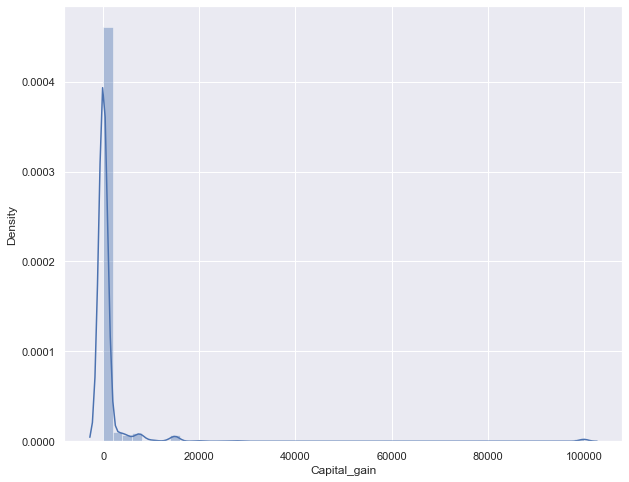

In [33]:
plt.figure(figsize=(10,8))
sns.distplot(data.Capital_gain)

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

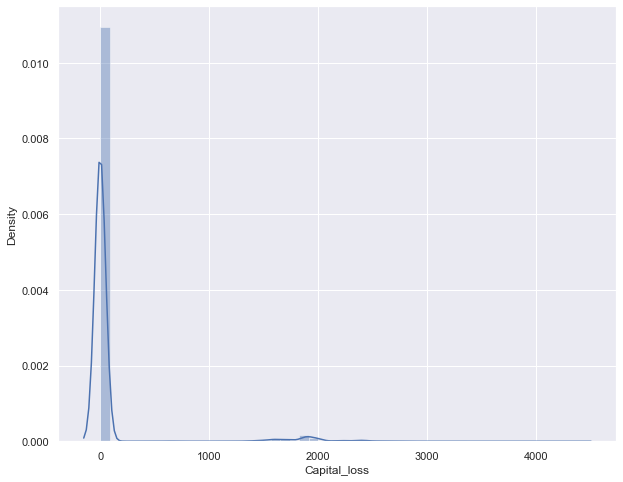

In [34]:
plt.figure(figsize=(10,8))
sns.distplot(data.Capital_loss)

<AxesSubplot:>

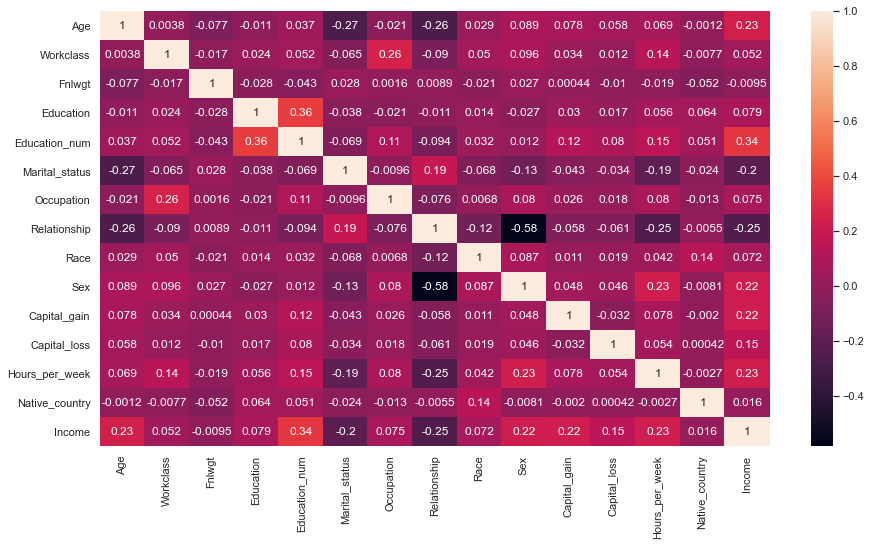

In [35]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)

- 34% correlation with Education_num
- 23% correlation with hours_per_week and age
- 22% correlation with Capital_gain
- The correlations are moderate.

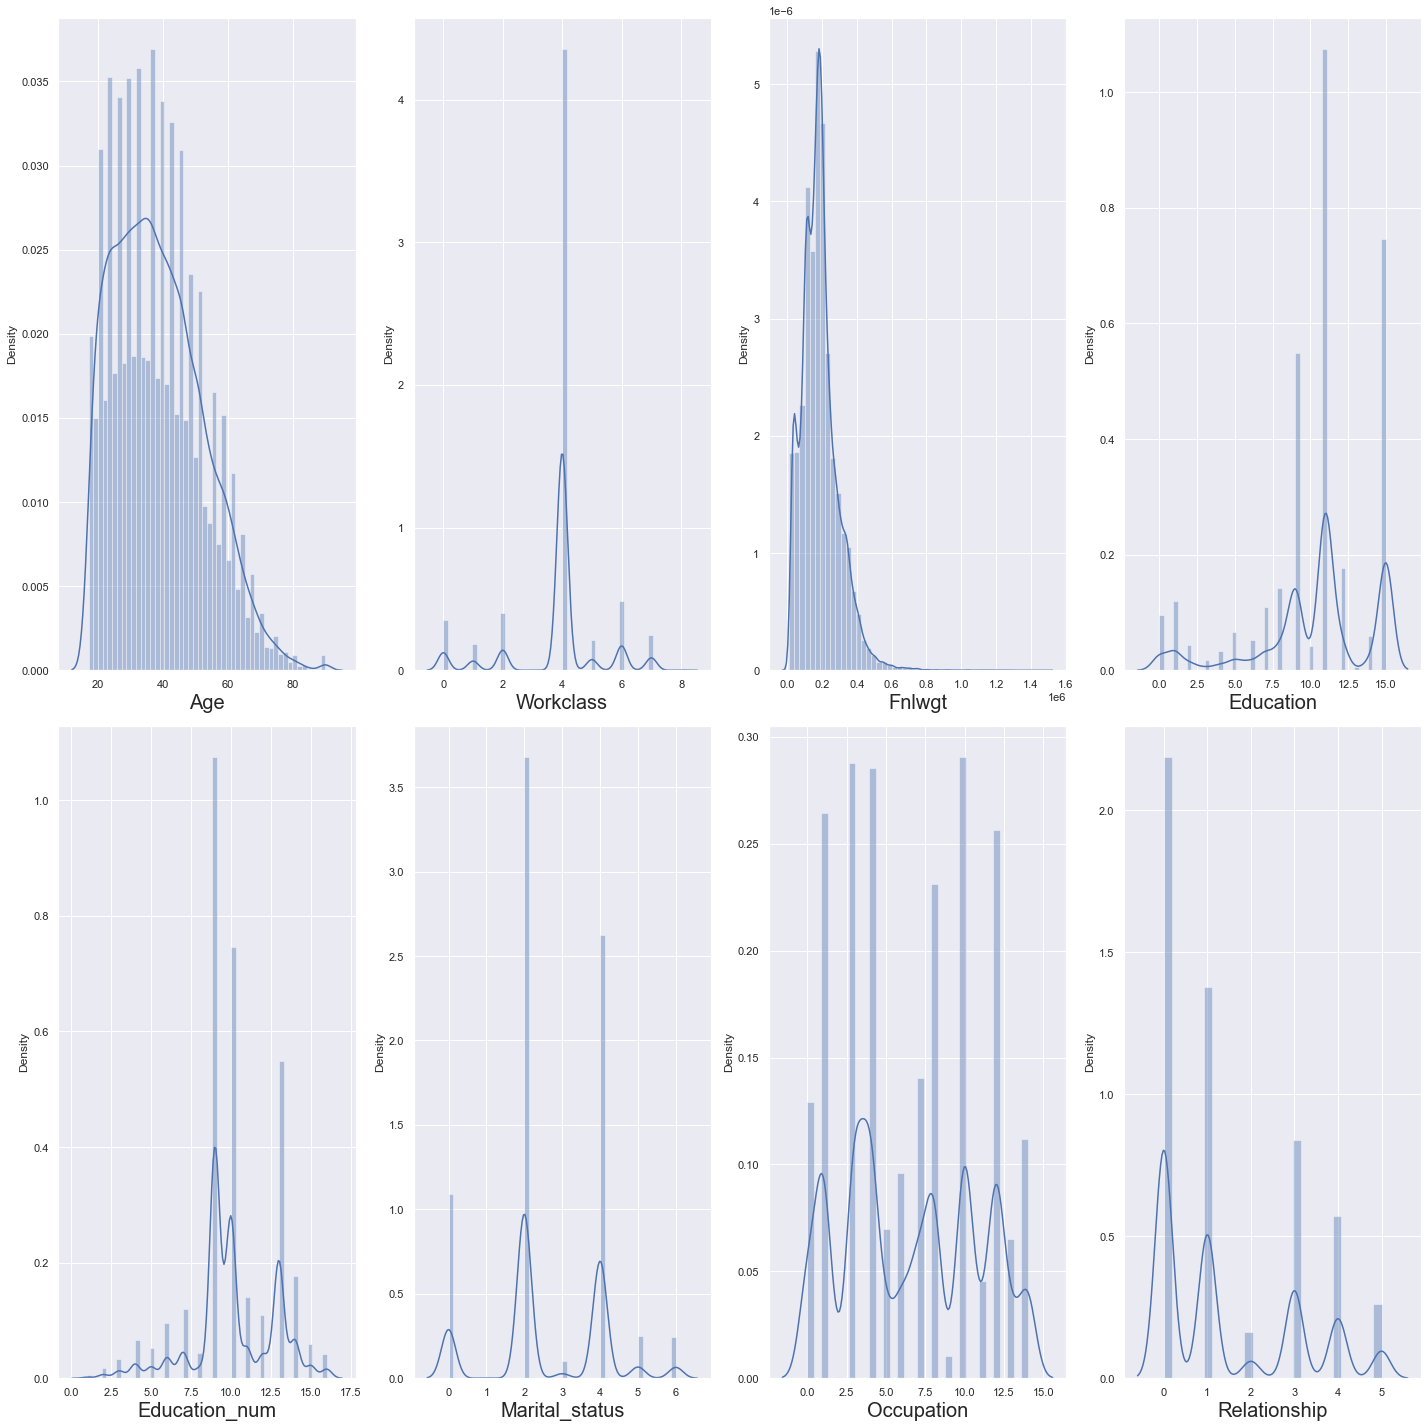

In [36]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

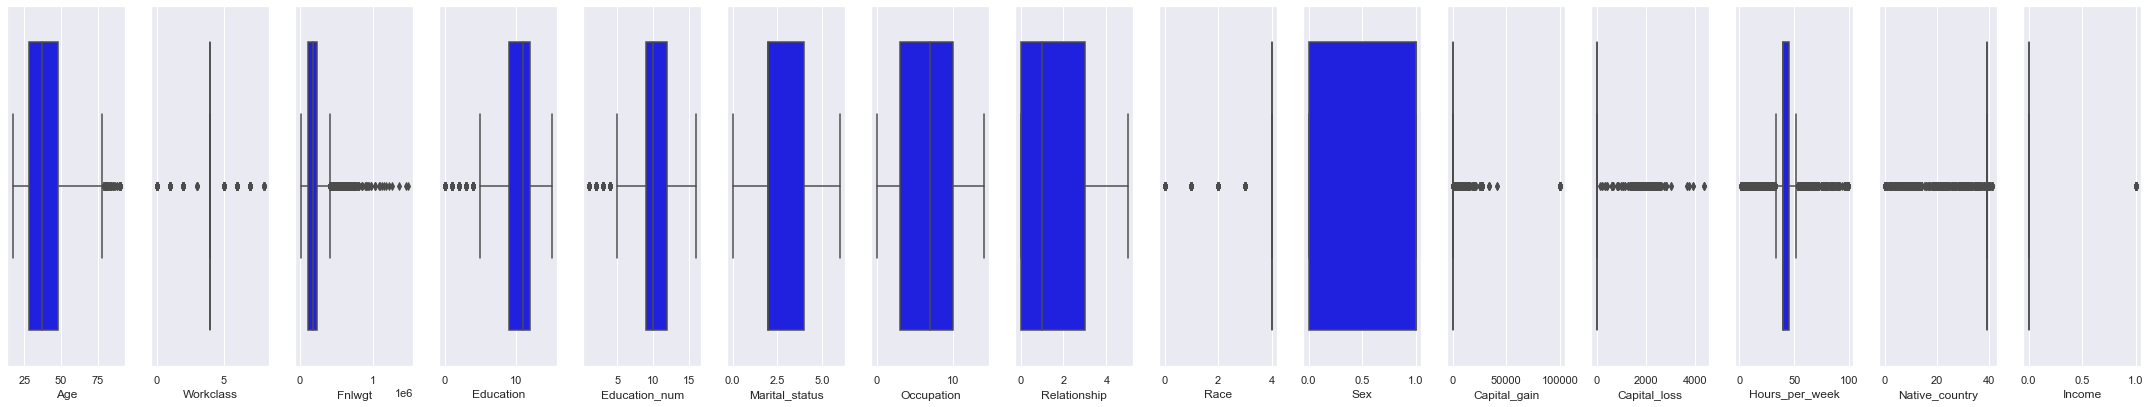

In [37]:
import matplotlib.pyplot as plt
collist=data.columns.values
ncol=30
nrows=16
plt.figure(figsize=(2*ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data[collist[i]],color='blue',orient='v')
    plt.tight_layout()

In [38]:
data.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

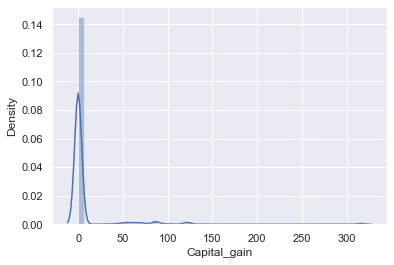

In [39]:
# Remove outlier from Capital_gain
data['Capital_gain']=np.sqrt(data['Capital_gain'])
sns.distplot(data['Capital_gain'])

In [40]:
data.skew()

Age               0.558738
Workclass        -0.752280
Fnlwgt            1.446972
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.114540
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      5.894949
Capital_loss      4.594549
Hours_per_week    0.227636
Native_country   -3.658235
Income            1.212383
dtype: float64

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [42]:
X=data.drop('Income',axis=1)
y=data['Income']

In [43]:
X

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,6,83311,9,13,2,4,0,4,1,0.000000,0,13,39
1,38,4,215646,11,9,0,6,1,4,1,0.000000,0,40,39
2,53,4,234721,1,7,2,6,0,2,1,0.000000,0,40,39
3,28,4,338409,9,13,2,10,5,2,0,0.000000,0,40,5
4,37,4,284582,12,14,2,4,5,4,0,0.000000,0,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0.000000,0,38,39
32556,40,4,154374,11,9,2,7,0,4,1,0.000000,0,40,39
32557,58,4,151910,11,9,6,1,4,4,0,0.000000,0,40,39
32558,22,4,201490,11,9,4,1,3,4,1,0.000000,0,20,39


In [44]:
sc.fit(X)

StandardScaler()

In [45]:
X=sc.transform(X)
X

array([[ 0.83709708,  1.46388339, -1.0087417 , ..., -0.21666301,
        -2.22212013,  0.29157343],
       [-0.04264043,  0.09012148,  0.24504633, ..., -0.21666301,
        -0.03542999,  0.29157343],
       [ 1.05703146,  0.09012148,  0.42576955, ..., -0.21666301,
        -0.03542999,  0.29157343],
       ...,
       [ 1.42358875,  0.09012148, -0.3588108 , ..., -0.21666301,
        -0.03542999,  0.29157343],
       [-1.21562378,  0.09012148,  0.11092744, ..., -0.21666301,
        -1.65520046,  0.29157343],
       [ 0.98372   ,  0.77700244,  0.92986178, ..., -0.21666301,
        -0.03542999,  0.29157343]])

In [46]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int32

## we can see that outcome has two value so we will use binary classification

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [48]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gn=GaussianNB()
svc=SVC()

In [49]:
for i in range(0,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    lr.fit(X_train,y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    print(f"At random state {i},the training accuracy is:-{accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:-{accuracy_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:-0.8222768222768223
At random state 0,the testing accuracy is:-0.8211302211302212


At random state 1,the training accuracy is:-0.8217035217035217
At random state 1,the testing accuracy is:-0.8255528255528255


At random state 2,the training accuracy is:-0.8217035217035217
At random state 2,the testing accuracy is:-0.8244471744471744


At random state 3,the training accuracy is:-0.8233415233415233
At random state 3,the testing accuracy is:-0.8190417690417691


At random state 4,the training accuracy is:-0.8226863226863227
At random state 4,the testing accuracy is:-0.8206388206388207


At random state 5,the training accuracy is:-0.8216216216216217
At random state 5,the testing accuracy is:-0.8255528255528255


At random state 6,the training accuracy is:-0.8227272727272728
At random state 6,the testing accuracy is:-0.8213759213759214


At random state 7,the training accuracy is:-0.8221130221130221
At random state 7,the testing accuracy is:-0.821

At random state 64,the training accuracy is:-0.8243243243243243
At random state 64,the testing accuracy is:-0.815970515970516


At random state 65,the training accuracy is:-0.8213759213759214
At random state 65,the testing accuracy is:-0.8227272727272728


At random state 66,the training accuracy is:-0.821048321048321
At random state 66,the testing accuracy is:-0.8266584766584767


At random state 67,the training accuracy is:-0.8219492219492219
At random state 67,the testing accuracy is:-0.8211302211302212


At random state 68,the training accuracy is:-0.8212121212121212
At random state 68,the testing accuracy is:-0.8223587223587223


At random state 69,the training accuracy is:-0.8219492219492219
At random state 69,the testing accuracy is:-0.8235872235872236


At random state 70,the training accuracy is:-0.8246519246519246
At random state 70,the testing accuracy is:-0.8178132678132678


At random state 71,the training accuracy is:-0.8220720720720721
At random state 71,the testing accu

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=11)
for i in [lr,dt,knn,gn,svc]:
    i.fit(X_train,y_train)
    pred=i.predict(X_test)
    test_score=accuracy_score(y_test,pred)
    train_score=accuracy_score(y_train,i.predict(X_train))
    print(i)
    print("Accuracy Score for Test Data is:",test_score)
    print("Accuracy Score for Train Data is: ",train_score)
    print("---------------------Classification Report---------------------")
    print(classification_report(y_test,pred))
    print("-----Confusion Matrix---------")
    print(confusion_matrix(y_test,pred))
    print("\n")

LogisticRegression()
Accuracy Score for Test Data is: 0.8248157248157248
Accuracy Score for Train Data is:  0.8208435708435708
---------------------Classification Report---------------------
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      6170
           1       0.71      0.46      0.56      1970

    accuracy                           0.82      8140
   macro avg       0.78      0.70      0.73      8140
weighted avg       0.81      0.82      0.81      8140

-----Confusion Matrix---------
[[5802  368]
 [1058  912]]


DecisionTreeClassifier()
Accuracy Score for Test Data is: 0.8071253071253072
Accuracy Score for Train Data is:  1.0
---------------------Classification Report---------------------
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      6170
           1       0.60      0.63      0.61      1970

    accuracy                           0.81      8140
   macro avg       0.74 

## Here SVC give best accuracy score and the score is 85%

In [51]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [52]:
rc=RandomForestClassifier()
ac=AdaBoostClassifier()
gc=GradientBoostingClassifier()

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=11)
for i in [rc,ac,gc]:
    i.fit(X_train,y_train)
    pred=i.predict(X_test)
    test_score=accuracy_score(y_test,pred)
    train_score=accuracy_score(y_train,i.predict(X_train))
    print(i)
    print("Accuracy Score for test Data is:",test_score)
    print("Accuracy Score for Train Data is: ",train_score)
    print("---------------------Classification Report---------------------")
    print(classification_report(y_test,pred))
    print("-----Confusion Matrix---------")
    print(confusion_matrix(y_test,pred))
    print("\n")

RandomForestClassifier()
Accuracy Score for test Data is: 0.8576167076167076
Accuracy Score for Train Data is:  1.0
---------------------Classification Report---------------------
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6170
           1       0.74      0.64      0.68      1970

    accuracy                           0.86      8140
   macro avg       0.81      0.78      0.80      8140
weighted avg       0.85      0.86      0.85      8140

-----Confusion Matrix---------
[[5727  443]
 [ 716 1254]]


AdaBoostClassifier()
Accuracy Score for test Data is: 0.8632678132678133
Accuracy Score for Train Data is:  0.8592137592137592
---------------------Classification Report---------------------
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6170
           1       0.77      0.62      0.69      1970

    accuracy                           0.86      8140
   macro avg       0.83 

## After checking different different classifier SVC gives 85% and Gradient Boost give 86.92% so best is Gradient boost classifier

## Cross Validation Score

In [54]:
pred_gc=gc.predict(X_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_gc)
for j in range(2,10):
    lsscore=cross_val_score(gc,X,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("cross validation score is:-",lsc*100)
    print("accuracy_score is:-",lss*100)
    print("\n")

At cv:- 2
cross validation score is:- 86.4465601965602
accuracy_score is:- 87.14987714987716


At cv:- 3
cross validation score is:- 86.51720880136223
accuracy_score is:- 87.14987714987716


At cv:- 4
cross validation score is:- 86.41891891891893
accuracy_score is:- 87.14987714987716


At cv:- 5
cross validation score is:- 86.40356265356266
accuracy_score is:- 87.14987714987716


At cv:- 6
cross validation score is:- 86.41279423327225
accuracy_score is:- 87.14987714987716


At cv:- 7
cross validation score is:- 86.35138251212088
accuracy_score is:- 87.14987714987716


At cv:- 8
cross validation score is:- 86.48341523341524
accuracy_score is:- 87.14987714987716


At cv:- 9
cross validation score is:- 86.49569591636053
accuracy_score is:- 87.14987714987716




In [55]:
score_selected=cross_val_score(gc,X,y,cv=3).mean()
print("The cv score is:",score_selected,"\nThe accuracy score is:",lss)

The cv score is: 0.8652027986579315 
The accuracy score is: 0.8714987714987715


## Hypertuning parameters

In [56]:
params={'learning_rate':[0.1,0.01],'max_depth':[3,4,5],'min_samples_leaf':[1,2],'min_samples_split':[2,3],'n_estimators':[10,50,100]}

In [57]:
gv=GridSearchCV(gc,params)

In [58]:
res=gv.fit(X_train,y_train)

In [59]:
res.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [65]:
pred=res.predict(X_test)
test_score=accuracy_score(y_test,pred)
train_score=accuracy_score(y_train,res.predict(X_train))
print("Accuracy Score for test Data is:",test_score)
print("Accuracy Score for Train Data is: ",train_score)
print("---------------------Classification Report---------------------")
print(classification_report(y_test,pred))
print("-----Confusion Matrix---------")
print(confusion_matrix(y_test,pred))
print("\n")

Accuracy Score for test Data is: 0.8766584766584766
Accuracy Score for Train Data is:  0.8861588861588862
---------------------Classification Report---------------------
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6170
           1       0.79      0.67      0.72      1970

    accuracy                           0.88      8140
   macro avg       0.84      0.80      0.82      8140
weighted avg       0.87      0.88      0.87      8140

-----Confusion Matrix---------
[[5824  346]
 [ 658 1312]]




## By using the hypertuning parameters we got 88% accuracy.

## AUC ROC Curve

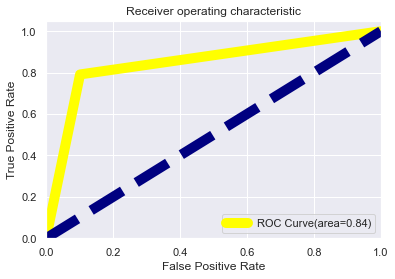

In [68]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresolds=roc_curve(pred,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,lw=10,color='yellow',label='ROC Curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
## Model Saving

In [69]:
import pickle
filename='Census_Income.pkl'
pickle.dump(res,open(filename,'wb'))

## Conclusion

In [70]:
a=np.array(y_test)
predicted=np.array(res.predict(X_test))
data_con=pd.DataFrame({'Original':a,'predicted':predicted})
data_con

,Original,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
8135,0,0
8136,1,1
8137,0,0
8138,0,0
